In [42]:
import pandas as pd
from random import *
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [43]:
#Importando o dataset
dataf = pd.read_csv("atlas2010.csv", decimal='.')
dataf

,ano,uf,mun,nome_mun,nome_micro,nome_meso,espvida,fectot,mort1,mort5,razdep,sobre40,sobre60,t_env,e_anosestudo,t_analf11a14,t_analf15a17,t_analf15m,t_analf18a24,t_analf18m,t_analf25a29,t_analf25m,t_atraso_0_basico,t_atraso_0_fund,t_atraso_0_med,t_atraso_1_basico,t_atraso_1_fund,t_atraso_1_med,t_atraso_2_basico,t_atraso_2_fund,t_atraso_2_med,t_fbbas,t_fbfund,t_fbmed,t_fbpre,t_fbsuper,t_flbas,t_flfund,t_flmed,t_flpre,t_flsuper,t_freq0a3,t_freq11a14,t_freq15a17,t_freq18a24,t_freq25a29,t_freq4a5,t_freq4a6,t_freq5a6,t_freq6,t_freq6a14,t_freq6a17,t_freqfund1517,t_freqfund1824,t_freqfund45,t_freqmed1824,t_freqmed614,t_freqsuper1517,t_fund11a13,t_fund12a14,t_fund15a17,t_fund16a18,t_fund18a24,t_fund18m,t_fund25m,t_med18a20,t_med18a24,t_med18m,t_med19a21,t_med25m,t_super25m,corte1,corte2,corte3,corte4,corte9,gini,pind,pindcri,pmpob,pmpobcri,ppob,ppobcri,pren10ricos,pren20,pren20ricos,pren40,pren60,pren80,prentrab,r1040,r2040,rdpc,rdpc1,rdpc10,rdpc2,rdpc3,rdpc4,rdpc5,rdpct,rind,rmpob,rpob,theil,cpr,emp,p_agro,p_com,p_constr,p_extr,p_formal,p_fund,p_med,p_serv,p_siup,p_super,p_transf,ren0,ren1,ren2,ren3,ren5,renocup,t_ativ,t_ativ1014,t_ativ1517,t_ativ1824,t_ativ18m,t_ativ2529,t_des,t_des1014,t_des1517,t_des1824,t_des18m,t_des2529,theiltrab,trabcc,trabpub,trabsc,t_agua,t_banagua,t_dens,t_lixo,t_luz,agua_esgoto,parede,t_crifundin_todos,t_fora4a5,t_fora6a14,t_fundin_todos,t_fundin_todos_mmeio,t_fundin18minf,t_m10a14cf,t_m15a17cf,t_mulchefefif014,t_nestuda_ntrab_mmeio,t_ocupdesloc_1,t_rmaxidoso,t_sluz,homem0a4,homem10a14,homem15a19,homem20a24,homem25a29,homem30a34,homem35a39,homem40a44,homem45a49,homem50a54,homem55a59,homem5a9,homem60a64,homem65a69,homem70a74,homem75a79,homemtot,homens80,mulh0a4,mulh10a14,mulh15a19,mulh20a24,mulh25a29,mulh30a34,mulh35a39,mulh40a44,mulh45a49,mulh50a54,mulh55a59,mulh5a9,mulh60a64,mulh65a69,mulh70a74,mulh75a79,mulher80,mulhertot,pea,pea1014,pea1517,pea18m,peso1,peso1114,peso1113,peso1214,peso13,peso15,peso1517,peso1524,peso1618,peso18,peso1820,peso1824,peso1921,peso25,peso4,peso5,peso6,peso610,peso617,peso65,pesom1014,pesom1517,pesom15m,pesom25m,pesorur,pesotot,pesourb,pia,pia1014,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r,falsa
0,2010,Rondonia,1100015,alta floresta d'oeste,cacoal,leste rondoniense,70.75,2.24,23.80,25.49,47.37,94.50,83.18,5.84,8.67,1.22,1.52,11.99,1.68,13.00,2.72,15.76,57.62,63.21,66.39,20.36,18.97,25.81,22.03,17.82,7.79,90.45,107.69,45.99,35.40,21.23,85.25,92.88,34.60,34.15,10.50,4.89,95.55,79.60,22.78,9.28,39.18,54.07,70.79,81.62,95.68,91.19,29.58,1.61,5.03,4.73,0.54,2.73,85.65,87.98,54.51,63.55,67.60,36.80,29.39,40.46,39.81,23.19,38.61,19.19,5.51,102.40,224.80,368.90,586.67,877.00,0.58,14.29,19.01,26.04,37.33,47.12,62.99,44.81,1.55,59.87,8.27,20.43,40.13,79.37,21.68,14.45,476.99,36.89,2137.18,160.31,289.97,469.88,1424.61,512.46,14.29,56.64,120.71,0.60,34.73,2.83,38.56,13.78,5.31,0.00,41.68,45.49,31.05,33.18,0.69,7.72,3.26,9.63,36.23,78.80,88.52,95.90,950.08,51.93,9.08,28.98,63.44,60.43,62.94,6.07,10.51,23.16,10.25,5.17,5.06,0.52,25.17,5.31,23.17,93.69,80.20,22.58,94.05,93.98,9.31,7.18,45.73,60.82,4.32,40.27,24.81,54.06,0.00,6.75,14.51,16.12,1.15,2.20,6.02,956,1256,1362,1105,1053,951,878,913,846,631,489,1073,351,301,239,154,12656,98,952,1145,1226,1095,1039,916,917,802,720,515,431,1034,311,264,177,119,73,11736,10611,218,464,9928,369,1883,1397,1434,1140,17976,1577,4788,1536,16399,1497,3211,1433,13188,399,429,413,2196,5170,1425,1145,747,8605,6284,10422,24392,13970,20434,2401,1602,16431,24097,22429,0.00,1.0,1.00,1.00,1.0,1.00,"1,1"
1,2010,Rondonia,1100023,ariquemes,ariquemes,leste rondoniense,73.36,1.91,19.20,20.53,46.68,96.12,87.69,4.36,9.18,1.55,1.09,7.90,1.13,8.53,1.89,10.48,58.43,60.96,72.93,22.22,22.30,23.11,19.35,16.74,3.96,94.78,106.62,58.77,46.92,27.95,85.46,91.31,37.07,40.96,12.91,9.89,97.60,76.42,26.43,14.81,55.34,66.99,77.46,92.19,97.21,92.07,25.11,3.24,10.56,4.99,1.79,0.18,84.18,84.35,56.98,67.22,72.70,51.36,45.62,40.53,46.22,34.58,47.77,31.45,8.13,200

In [44]:
#verificar tipo de dados
dataf['agua_esgoto'].dtype

dtype('float64')

In [45]:
#exibir todas as colunas
pd.set_option('display.max_columns', None)
print(dataf.columns.tolist())

['ano', 'uf', 'mun', 'nome_mun', 'nome_micro', 'nome_meso', 'espvida', 'fectot', 'mort1', 'mort5', 'razdep', 'sobre40', 'sobre60', 't_env', 'e_anosestudo', 't_analf11a14', 't_analf15a17', 't_analf15m', 't_analf18a24', 't_analf18m', 't_analf25a29', 't_analf25m', 't_atraso_0_basico', 't_atraso_0_fund', 't_atraso_0_med', 't_atraso_1_basico', 't_atraso_1_fund', 't_atraso_1_med', 't_atraso_2_basico', 't_atraso_2_fund', 't_atraso_2_med', 't_fbbas', 't_fbfund', 't_fbmed', 't_fbpre', 't_fbsuper', 't_flbas', 't_flfund', 't_flmed', 't_flpre', 't_flsuper', 't_freq0a3', 't_freq11a14', 't_freq15a17', 't_freq18a24', 't_freq25a29', 't_freq4a5', 't_freq4a6', 't_freq5a6', 't_freq6', 't_freq6a14', 't_freq6a17', 't_freqfund1517', 't_freqfund1824', 't_freqfund45', 't_freqmed1824', 't_freqmed614', 't_freqsuper1517', 't_fund11a13', 't_fund12a14', 't_fund15a17', 't_fund16a18', 't_fund18a24', 't_fund18m', 't_fund25m', 't_med18a20', 't_med18a24', 't_med18m', 't_med19a21', 't_med25m', 't_super25m', 'corte1', 'c

In [46]:
####Gerando regressão linear multipla 
# Executa a regressão linear
model = sm.ols(formula="t_analf25m ~ mort1 + agua_esgoto", data=dataf).fit()

# Exibe os resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             t_analf25m   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     6675.
Date:                Tue, 12 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:46:53   Log-Likelihood:                -18664.
No. Observations:                5565   AIC:                         3.733e+04
Df Residuals:                    5562   BIC:                         3.735e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.4798      0.288    -22.464      

In [47]:
residuals = model.resid
residuals
#calculando os resíduos do modelo (elevando eles ao quadrado)
residuo = 0
for i in range(len(residuals)):
    novo_residuo = residuals[i] * residuals[i]
    residuo_total = residuo + novo_residuo
    
residuo_total

np.float64(64.47507860252595)

In [48]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [49]:
bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_test_statistic = bp_test[0]
bp_test_pvalue = bp_test[1]

In [50]:
#Estatística do teste
bp_test_statistic

np.float64(579.5382815403781)

In [51]:
#P-valor
bp_test_pvalue

np.float64(1.4284371536279615e-126)

In [52]:
grupos = dataf['uf']
grupos

0               Rondonia
1               Rondonia
2               Rondonia
3               Rondonia
4               Rondonia
              ...       
5560               Goias
5561               Goias
5562               Goias
5563               Goias
5564    Distrito Federal
Name: uf, Length: 5565, dtype: object

In [53]:
#Gerando um novo modelo ajustado aos grupos
from statsmodels.formula.api import mixedlm

# Crie um objeto da classe "MixedLM" e ajuste o modelo
mixed_model = mixedlm(formula="t_analf25m ~ mort1 + agua_esgoto",groups=grupos, data=dataf)

result = mixed_model.fit()

# Imprima os resultados
print(result.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: t_analf25m 
No. Observations: 5565    Method:             REML       
No. Groups:       27      Scale:              31.7017    
Min. group size:  1       Log-Likelihood:     -17583.8154
Max. group size:  853     Converged:          Yes        
Mean group size:  206.1                                  
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       3.906    1.232  3.170 0.002  1.491  6.321
mort1           0.775    0.021 37.169 0.000  0.734  0.816
agua_esgoto     0.194    0.010 20.400 0.000  0.176  0.213
Group Var      35.198    1.801                           



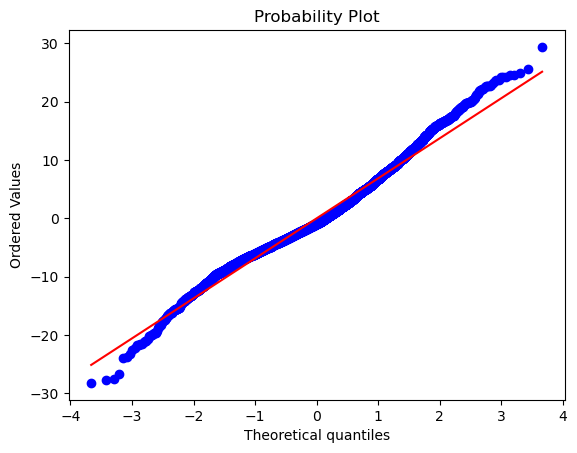

In [54]:
#gráfico qq-plot
from scipy import stats
import matplotlib.pyplot as plt

# Crie o Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)

# Exiba o gráfico
plt.show()

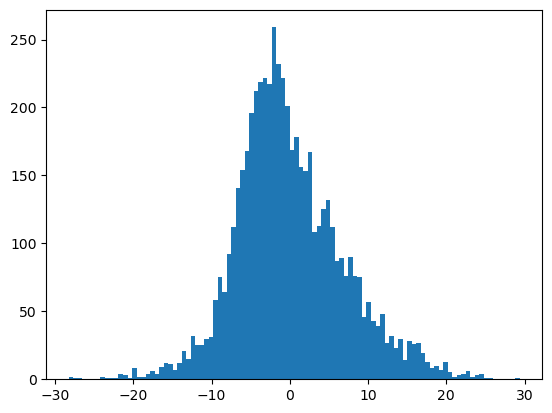

In [55]:
#exibindo um histograma
import matplotlib.pyplot as plt

# Crie o histograma com 100 bins
plt.hist(residuals, bins=100)

# Exiba o gráfico

plt.show()

In [56]:
entrada = dataf[["mort1", "agua_esgoto"]]
entrada

,mort1,agua_esgoto
0,23.80,9.31
1,19.20,11.40
2,24.80,3.31
3,14.30,1.85
4,18.10,5.34
...,...,...
5560,14.40,0.38
5561,15.70,9.04
5562,14.50,1.98
5563,15.90,6.63


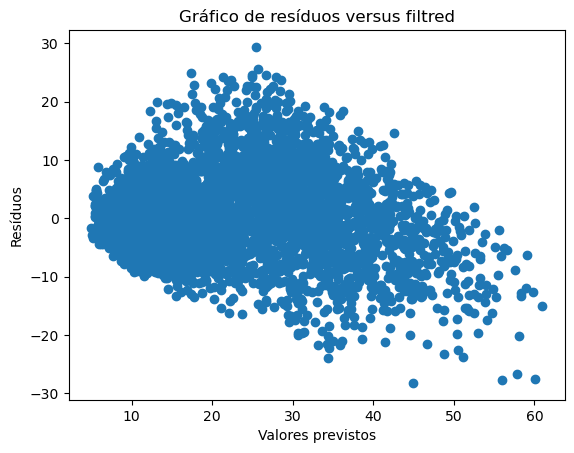

In [57]:
predicted = model.predict(entrada)

import matplotlib.pyplot as plt

# Suponha que você tenha os resíduos da regressão em um array chamado residuals
# e os valores previstos pelo modelo em um array chamado predicted

# Crie o gráfico
plt.scatter(predicted, residuals)

# Defina o título do gráfico e os rótulos dos eixos
plt.title("Gráfico de resíduos versus filtred")
plt.xlabel("Valores previstos")
plt.ylabel("Resíduos")

# Exiba o gráfico
plt.show()

In [58]:
#verificando versão do statsmodels
import pkg_resources
statsmodels_version = pkg_resources.get_distribution('statsmodels').version
print(statsmodels_version)

0.14.4


In [61]:
#exibindo o valor p explicitamente
p_value

np.float64(3.2602668216761434e-26)

In [62]:
#Testando se os resíduos seguem uma distiruição gama
# Importe a distribuição gama da biblioteca scipy
from scipy.stats import kstest
from scipy.stats import gamma

# Calcule os parâmetros da distribuição gama a partir dos dados
shape, _, scale = gamma.fit(residuals)

# Realize o teste de K-S para a distribuição gama
statistic, p_value = kstest(residuals, 'gamma', args=(shape, 0, scale))

print(p_value)

0.0


In [63]:
###Teste de Goldfeld-Quandt
import statsmodels.api as sm1

from statsmodels.regression.linear_model import OLS

_, pval, _ = sm1.stats.diagnostic.het_goldfeldquandt(residuals, model.model.exog)

print(pval)

0.9999999999999999


In [64]:
# Calcular a correlação

from scipy.stats import spearmanr
corr, pval = spearmanr(dataf['agua_esgoto'], dataf['mort1'])


In [65]:
#Correlação
corr

np.float64(0.7283519600111219)

In [66]:
#valor p
pval

np.float64(0.0)

In [67]:
# Calcular o VIF
vif = 1 / (1 - model.rsquared)

In [41]:
print(vif)

3.400053249866333
